In [1]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet

from plain_net.PlainNet import PlainNet
from duffing_dataset import *

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    data = pickle.load(f)

In [50]:
t = torch.linspace(0, data.DT * len(data.x), len(data.y))

training_set, validation_set = torch.utils.data.random_split(data, [int(0.8 * len(data)), len(data) - int(0.8 * len(data))])
training_loader = DataLoader(training_set.dataset, batch_size=100, shuffle=True)
validation_loader = DataLoader(validation_set.dataset, batch_size=100, shuffle=True)

In [48]:
model = SoftThresholdNet(3, [[24, 24], [24, 24]], 2, s_init=1)

In [49]:
model.train_n_epochs(data_loader=training_set, n_epochs = 1000, lr = 0.00001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 2.662379264831543


KeyboardInterrupt: 

In [22]:
y_pred = model(validation_set.dataset.x)

In [24]:
torch.sum((y_pred - training_loader.dataset.dataset.y)**2) / len(training_loader.dataset.dataset.y)

tensor(0.2477, grad_fn=<DivBackward0>)

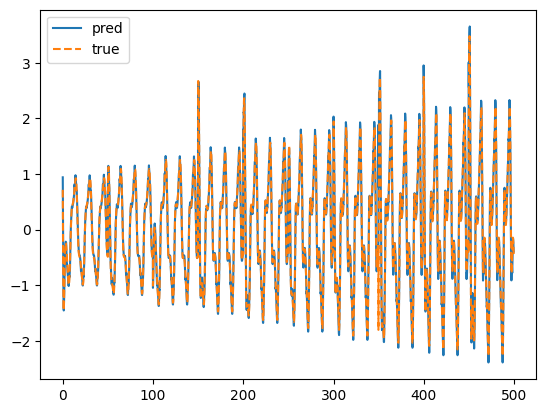

In [31]:
plt.plot(t, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t, validation_loader.dataset.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [26]:

s_threshhold = [layer.s.detach().item() for layer in model.layers]

In [27]:
s_threshhold

[1.0437417030334473,
 0.9934771060943604,
 1.0460032224655151,
 1.1150546073913574]

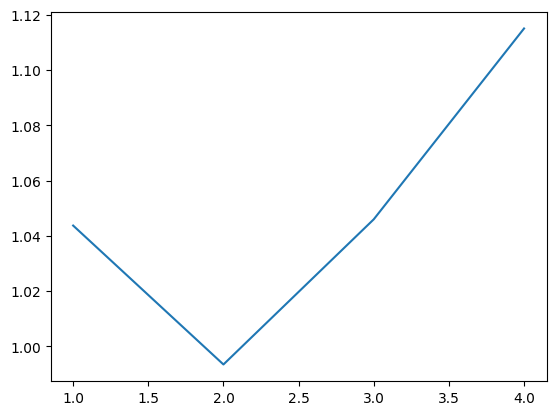

In [28]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [29]:
model.get_sparsity()

tensor(0.6989)

In [30]:
model.layers[0].get_sparse_weights()

tensor([[ 1.0067,  0.2659, -0.5752, -0.0000, -0.0000, -0.9557,  0.0000,  0.0000,
         -0.0000,  1.3785, -0.0000,  1.2145,  0.0000,  1.0918,  0.0000,  0.2478,
          0.0000, -0.5497, -0.0000,  0.8677, -0.0000, -0.0000, -0.6921, -0.0000],
        [-0.3839, -0.4556,  0.0000, -0.3253,  0.0000,  0.0000, -0.0000,  1.0585,
         -0.0000,  0.7224, -0.3221,  0.0000, -0.0475,  0.3627, -0.0000,  0.0000,
          0.8264,  0.0000,  0.0000, -0.0000, -0.3902,  0.0000,  0.5524, -0.0000],
        [ 0.1488,  0.0000, -0.0000, -0.3883,  0.0000, -0.0000, -0.0000,  0.0000,
          0.0000,  0.0000, -0.0000,  0.1846, -0.0000,  0.0133,  0.3844, -0.0000,
         -0.0000,  0.0000,  0.2010, -0.0000,  1.1387, -0.5677,  0.0000,  0.0000]],
       grad_fn=<MulBackward0>)